<a href="https://colab.research.google.com/github/ann-las/DL_project/blob/main/create_final_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script recreates plots for Figure 4.

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%load_ext rpy2.ipython

## Initialization

In [3]:
%%R

rm(list=ls())

#########################################################
# Authors: The Membrane Miners (s173461, abrisa, puqu)
# Date: December 2023
#
# Script to create figures for loss and F1 score trajectories
#########################################################

#if(!require(devtools)) install.packages("devtools") # Only necesssary for combined plots. Can be left out if it doesn't work.
#devtools::install_github("kassambara/ggpubr")

library(tidyverse)
library(ggpubr)






── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Error in library(ggpubr) : there is no package called ‘ggpubr’


User-added files:

In [4]:
%%R
final_exp <- read_csv("/path/to/output_v34.csv")
out_micro <- read_csv("/path/to/micro_end_metrics.csv")
out_macro <- read_csv("/path/to/macro_end_metrics.csv")
out_softmax_micro <- read_csv("/path/to/micro/softmax_metrics.csv")

Rows: 149 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): val/loss/total, lr-Adam, step, val/loss/node_label, val/node_label...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Plots for final experiment

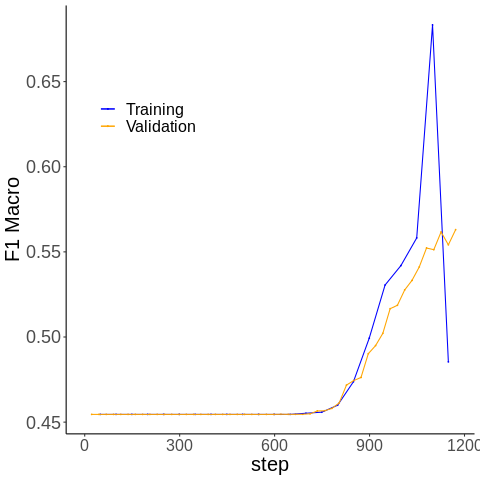

In [6]:
%%R

final_exp %>%
  mutate(epoch = as.factor(epoch)) %>%
  ggplot(aes(x = step)) +
  geom_point(aes(y = `train/node_label/f1_score`, color = "Training"), size = 0.2) +
  geom_point(aes(y = `val/node_label/f1_score`, color = "Validation"), size = 0.2) +
  geom_path(aes(y = `train/node_label/f1_score`, group = ifelse(!is.na(`train/node_label/f1_score`), "Training", NA), color = "Training"), show.legend = TRUE) +
  geom_path(aes(y = `val/node_label/f1_score`, group = ifelse(!is.na(`val/node_label/f1_score`), "Validation", NA), color = "Validation"), show.legend = TRUE) +
  theme_bw() +
  #labs(title = "Loss") +
  ylab('F1 Macro') +
  scale_color_manual(values = c("Training" = "blue", "Validation" = "orange"),
                     labels = c("Training", "Validation")) +
  theme_classic() +
  theme(legend.position = c(0.2, 0.75), #legend.position = "bottom",
        legend.background = element_rect(fill = "white"),
        legend.title = element_blank(),
        text = element_text(size = 20),
        axis.text.y=element_text(size=18))


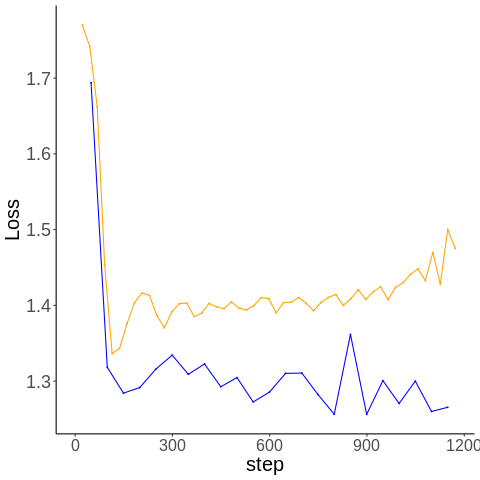

In [7]:
%%R

final_exp %>%
  mutate(epoch = as.factor(epoch)) %>%
  ggplot(aes(x = step)) +
  geom_point(aes(y = `train/loss/node_label`, color = "Training"), size = 0.2) +
  geom_point(aes(y = `val/loss/node_label`, color = "Validation"), size = 0.2) +
  geom_path(aes(y = `train/loss/node_label`, group = ifelse(!is.na(`train/loss/node_label`), "Training", NA), color = "Training"), show.legend = TRUE) +
  geom_path(aes(y = `val/loss/node_label`, group = ifelse(!is.na(`val/loss/node_label`), "Validation", NA), color = "Validation"), show.legend = TRUE) +
  theme_bw() +
  #labs(title = "Loss") +
  ylab('Loss') +
  scale_color_manual(values = c("Training" = "blue", "Validation" = "orange"),
                     labels = c("Training", "Validation")) +
  theme_classic() +
  theme(legend.position = "None",
        legend.background = element_rect(fill = "white"),
        legend.title = element_blank(),
        text = element_text(size = 20),
        axis.text.y=element_text(size=18))

## Plots for final training

In [ ]:
%%R

# Produce F1 micro plot
val_f1micro <- out_micro %>%
  mutate(epoch = as.factor(epoch)) %>%
  ggplot(aes(x = step)) +
  geom_point(aes(y = `train/node_label/f1_score`, color = "Training"), size = 0.2) +
  geom_point(aes(y = `val/node_label/f1_score`, color = "Validation"), size = 0.2) +
  geom_path(aes(y = `train/node_label/f1_score`, group = ifelse(!is.na(`train/node_label/f1_score`), "Training", NA), color = "Training"), show.legend = TRUE) +
  geom_path(aes(y = `val/node_label/f1_score`, group = ifelse(!is.na(`val/node_label/f1_score`), "Validation", NA), color = "Validation"), show.legend = TRUE) +
  theme_bw() +
  #labs(title = "Loss") +
  ylab('F1 Micro') +
  scale_color_manual(values = c("Training" = "blue", "Validation" = "orange"),
                     labels = c("Training", "Validation")) +
  theme_classic() +
  theme(legend.position = c(0.8, 0.75), #legend.position = "bottom",
        legend.background = element_rect(fill = "white"),
        legend.title = element_blank(),
        text = element_text(size = 20),
        axis.text.y=element_text(size=18))
val_f1micro




In [ ]:
%%R

# Produce F1 macro plot
val_f1macro <- out_macro %>%
  mutate(epoch = as.factor(epoch)) %>%
  ggplot(aes(x = step)) +
  geom_point(aes(y = `train/node_label/f1_score`, color = "Training"), size = 0.2) +
  geom_point(aes(y = `val/node_label/f1_score`, color = "Validation"), size = 0.2) +
  geom_path(aes(y = `train/node_label/f1_score`, group = ifelse(!is.na(`train/node_label/f1_score`), "Training", NA), color = "Training"), show.legend = TRUE) +
  geom_path(aes(y = `val/node_label/f1_score`, group = ifelse(!is.na(`val/node_label/f1_score`), "Validation", NA), color = "Validation"), show.legend = TRUE) +
  theme_bw() +
  #labs(title = "Loss") +
  ylab('F1 Macro') +
  scale_color_manual(values = c("Training" = "blue", "Validation" = "orange"),
                     labels = c("Training", "Validation")) +
  theme_classic() +
  theme(legend.position = "None",
        legend.background = element_rect(fill = "white"),
        legend.title = element_blank(),
        text = element_text(size = 20),
        axis.text.x=element_text(size=18),
        axis.text.y=element_text(size=18))
val_f1macro



In [ ]:
%%R

# Create loss plot for micro run
loss_micro <- out_micro %>%
  mutate(epoch = as.factor(epoch)) %>%
  ggplot(aes(x = step)) +
  geom_point(aes(y = `train/loss/node_label`, color = "Training"), size = 0.2) +
  geom_point(aes(y = `val/loss/node_label`, color = "Validation"), size = 0.2) +
  geom_path(aes(y = `train/loss/node_label`, group = ifelse(!is.na(`train/loss/node_label`), "Training", NA), color = "Training"), show.legend = TRUE) +
  geom_path(aes(y = `val/loss/node_label`, group = ifelse(!is.na(`val/loss/node_label`), "Validation", NA), color = "Validation"), show.legend = TRUE) +
  theme_bw() +
  #labs(title = "Loss (micro)") +
  ylab('Loss (micro)') +
  scale_color_manual(values = c("Training" = "blue", "Validation" = "orange"),
                     labels = c("Training", "Validation")) +
  theme_classic() +
  theme(legend.position = "None",
        legend.background = element_rect(fill = "white"),
        legend.title = element_blank(),
        text = element_text(size = 20),
        axis.text.y=element_text(size=18))



In [ ]:
%%R

# Create loss plot for macro run
loss_macro <- out_macro %>%
  mutate(epoch = as.factor(epoch)) %>%
  ggplot(aes(x = step)) +
  geom_point(aes(y = `train/loss/node_label`, color = "Training"), size = 0.2) +
  geom_point(aes(y = `val/loss/node_label`, color = "Validation"), size = 0.2) +
  geom_path(aes(y = `train/loss/node_label`, group = ifelse(!is.na(`train/loss/node_label`), "Training", NA), color = "Training"), show.legend = TRUE) +
  geom_path(aes(y = `val/loss/node_label`, group = ifelse(!is.na(`val/loss/node_label`), "Validation", NA), color = "Validation"), show.legend = TRUE) +
  theme_bw() +
  #labs(title = "Loss (macro)") +
  ylab('Loss (macro)') +
  scale_color_manual(values = c("Training" = "blue", "Validation" = "orange"),
                     labels = c("Training", "Validation")) +
  theme_classic() +
  theme(legend.position = "bottom",
        legend.background = element_rect(fill = "white"),
        legend.title = element_blank(),
        text = element_text(size = 20),
        axis.text.y=element_text(size=18))



In [ ]:
%%R
# Create common loss plot
ggarrange(loss_micro, loss_macro, nrow = 2, common.legend = TRUE)


In [ ]:
%%R
# Create common loss and f1 plot
common_plot <- ggarrange(loss_micro, val_f1micro, val_f1macro, nrow = 3, common.legend = TRUE, legend = "bottom")

## Plots for softmax


In [ ]:
%%R

# F1 micro
out_softmax_micro %>%
  mutate(epoch = as.factor(epoch)) %>%
  ggplot(aes(x = step)) +
  geom_point(aes(y = `train/node_label/f1_score`, color = "Training"), size = 0.2) +
  geom_point(aes(y = `val/node_label/f1_score`, color = "Validation"), size = 0.2) +
  geom_path(aes(y = `train/node_label/f1_score`, group = ifelse(!is.na(`train/node_label/f1_score`), "Training", NA), color = "Training"), show.legend = TRUE) +
  geom_path(aes(y = `val/node_label/f1_score`, group = ifelse(!is.na(`val/node_label/f1_score`), "Validation", NA), color = "Validation"), show.legend = TRUE) +
  theme_bw() +
  #labs(title = "Loss") +
  ylab('F1 Micro') +
  scale_color_manual(values = c("Training" = "blue", "Validation" = "orange"),
                     labels = c("Training", "Validation")) +
  theme_classic() +
  theme(legend.position = c(0.8, 0.75), #legend.position = "bottom",
        legend.background = element_rect(fill = "white"),
        legend.title = element_blank(),
        text = element_text(size = 20),
        axis.text.y=element_text(size=18))


In [ ]:
%%R

# Loss
out_softmax_micro %>%
  mutate(epoch = as.factor(epoch)) %>%
  ggplot(aes(x = step)) +
  geom_point(aes(y = `train/loss/node_label`, color = "Training"), size = 0.2) +
  geom_point(aes(y = `val/loss/node_label`, color = "Validation"), size = 0.2) +
  geom_path(aes(y = `train/loss/node_label`, group = ifelse(!is.na(`train/loss/node_label`), "Training", NA), color = "Training"), show.legend = TRUE) +
  geom_path(aes(y = `val/loss/node_label`, group = ifelse(!is.na(`val/loss/node_label`), "Validation", NA), color = "Validation"), show.legend = TRUE) +
  theme_bw() +
  #labs(title = "Loss") +
  ylab('Loss') +
  scale_color_manual(values = c("Training" = "blue", "Validation" = "orange"),
                     labels = c("Training", "Validation")) +
  theme_classic() +
  theme(legend.position = "None",
        legend.background = element_rect(fill = "white"),
        legend.title = element_blank(),
        text = element_text(size = 20),
        axis.text.y=element_text(size=18))